<a href="https://colab.research.google.com/github/saransh317/Stock-Market-Prediction/blob/main/Prediction_General_Electric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

LSTM

In [2]:
def plot_predictions(test, predicted):
  plt.plot(test, color='red', label='Real General Electric Stock Price')
  plt.plot(predicted, color='blue', label='Predicted General Electric Stock Price')
  plt.title("Stock Price Prediction")
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()

In [3]:
def return_rmse(test, predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print("Root Mean Squared Error is{}".format(rmse))

In [4]:
dataset = pd.read_csv('/content/GE_2006-01-01_to_2018-01-01.csv', index_col='Date',
                      parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,35.10,35.40,34.80,35.37,33221400,GE
2006-01-04,35.35,35.40,35.10,35.32,24017300,GE
2006-01-05,35.27,35.35,35.10,35.23,18860400,GE
2006-01-06,35.38,35.53,35.19,35.47,22085300,GE
2006-01-09,35.40,35.43,35.24,35.38,20716900,GE


In [5]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

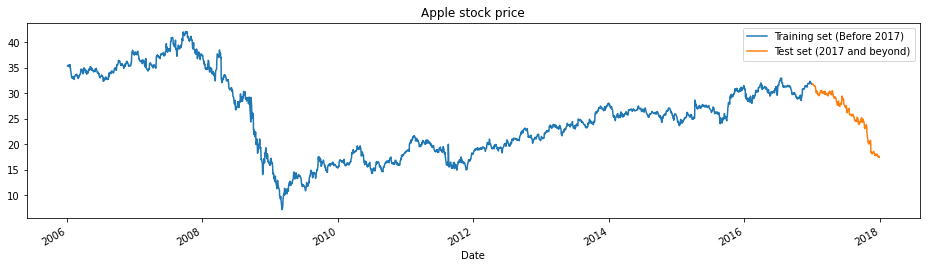

In [6]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Apple stock price')
plt.show()

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
training_set_scaled.shape

(2769, 1)

In [9]:
for i in range(60,2768):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Tautology Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [11]:
#RNN Architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X_train[0:5416,:], y_train, epochs=40, batch_size=32)

Epoch 1/40
85/85 [==============================] - 9s 108ms/step - loss: 0.0191
Epoch 2/40
85/85 [==============================] - 9s 109ms/step - loss: 0.0044
Epoch 3/40
85/85 [==============================] - 9s 111ms/step - loss: 0.0041
Epoch 4/40
85/85 [==============================] - 9s 111ms/step - loss: 0.0041
Epoch 5/40
85/85 [==============================] - 10s 115ms/step - loss: 0.0033
Epoch 6/40
85/85 [==============================] - 10s 113ms/step - loss: 0.0034
Epoch 7/40
85/85 [==============================] - 10s 114ms/step - loss: 0.0030
Epoch 8/40
85/85 [==============================] - 10s 113ms/step - loss: 0.0034
Epoch 9/40
85/85 [==============================] - 10s 112ms/step - loss: 0.0030
Epoch 10/40
85/85 [==============================] - 9s 111ms/step - loss: 0.0027
Epoch 11/40
85/85 [==============================] - 10s 112ms/step - loss: 0.0027
Epoch 12/40
85/85 [==============================] - 10s 113ms/step - loss: 0.0027
Epoch 13/40
85/85 

In [14]:
dataset_total = pd.concat((dataset["High"][:'2016'], dataset['High']['2017':]), axis=0)
input = dataset_total[len(dataset_total) - len(test_set) - 60:].values
input = input.reshape(-1,1)
inputs = sc.transform(input)

In [15]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

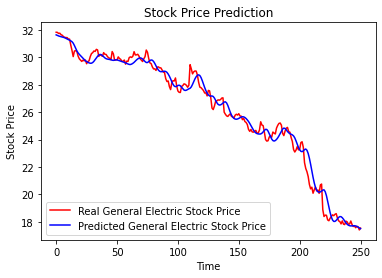

In [16]:
plot_predictions(test_set,predicted_stock_price)

GRU

In [17]:
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape = (X_train.shape[1],1), 
                 activation='tanh'))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape = (X_train.shape[1],1), 
                 activation='tanh'))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape = (X_train.shape[1],1), 
                 activation='tanh'))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, activation='tanh'))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))

In [21]:
modelGRU.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
modelGRU.fit(X_train,y_train,epochs=50,batch_size=128)

Epoch 1/50
22/22 [==============================] - 4s 192ms/step - loss: 0.0558
Epoch 2/50
22/22 [==============================] - 4s 194ms/step - loss: 0.0089
Epoch 3/50
22/22 [==============================] - 4s 196ms/step - loss: 0.0050
Epoch 4/50
22/22 [==============================] - 4s 196ms/step - loss: 0.0046
Epoch 5/50
22/22 [==============================] - 4s 197ms/step - loss: 0.0044
Epoch 6/50
22/22 [==============================] - 4s 198ms/step - loss: 0.0039
Epoch 7/50
22/22 [==============================] - 4s 202ms/step - loss: 0.0038
Epoch 8/50
22/22 [==============================] - 4s 202ms/step - loss: 0.0034
Epoch 9/50
22/22 [==============================] - 4s 201ms/step - loss: 0.0034
Epoch 10/50
22/22 [==============================] - 4s 203ms/step - loss: 0.0033
Epoch 11/50
22/22 [==============================] - 4s 199ms/step - loss: 0.0031
Epoch 12/50
22/22 [==============================] - 4s 195ms/step - loss: 0.0031
Epoch 13/50
22/22 [======

In [23]:
predicted_stock_price = modelGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

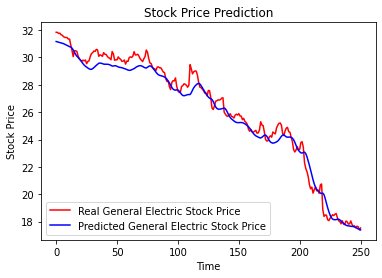

In [24]:
plot_predictions(test_set, predicted_stock_price)